In [1]:
from tensorflow import keras
import tensorflow as tf
import numpy as np
import sys
import matplotlib.pyplot as plt

print(tf.__version__)

2.12.0


In [2]:
# Sequential API
# Functional API
# Subclassing API

In [3]:
# Sequential API
model_seq = keras.Sequential(name = 'model_sequential')

model_seq.add(keras.Input(shape = (10,), name= 'InputLayer'))
model_seq.add(keras.layers.Dense(64, 'relu', name = 'Hidden1'))
model_seq.add(keras.layers.Dropout(0.2, name = 'Dropout'))
model_seq.add(keras.layers.Dense(32,'relu', name = 'Hidden2'))
model_seq.add(keras.layers.Dense(10, 'softmax', name = 'output'))

model_seq.summary()

Model: "model_sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden1 (Dense)             (None, 64)                704       
                                                                 
 Dropout (Dropout)           (None, 64)                0         
                                                                 
 Hidden2 (Dense)             (None, 32)                2080      
                                                                 
 output (Dense)              (None, 10)                330       
                                                                 
Total params: 3,114
Trainable params: 3,114
Non-trainable params: 0
_________________________________________________________________


In [5]:
model_seq2 = keras.Sequential([
    keras.Input(shape = (10,), name= 'InputLayer'),
    keras.layers.Dense(64, 'relu', name = 'Hidden1'),
    keras.layers.Dropout(0.2, name = 'Dropout'),
    keras.layers.Dense(32,'relu', name = 'Hidden2'),
    keras.layers.Dense(10, 'softmax', name = 'output')
])

model_seq2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden1 (Dense)             (None, 64)                704       
                                                                 
 Dropout (Dropout)           (None, 64)                0         
                                                                 
 Hidden2 (Dense)             (None, 32)                2080      
                                                                 
 output (Dense)              (None, 10)                330       
                                                                 
Total params: 3,114
Trainable params: 3,114
Non-trainable params: 0
_________________________________________________________________


In [7]:
## Functional API
inputs = keras.Input(shape = (10, ), name = 'InputLayer')
hidden1 = keras.layers.Dense(64, 'relu', name = 'hidden1')(inputs)
drop_out = keras.layers.Dropout(0.2, name = 'Dropout')(hidden1)
hidden2 = keras.layers.Dense(32, 'relu', name = 'hidden2')(drop_out)
outputs = keras.layers.Dense(10, 'softmax', name = 'output')(hidden2)

model_func = keras.Model(inputs = inputs, outputs = outputs, name = 'model_func')

model_func.summary()

Model: "model_func"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 InputLayer (InputLayer)     [(None, 10)]              0         
                                                                 
 hidden1 (Dense)             (None, 64)                704       
                                                                 
 Dropout (Dropout)           (None, 64)                0         
                                                                 
 hidden2 (Dense)             (None, 32)                2080      
                                                                 
 output (Dense)              (None, 10)                330       
                                                                 
Total params: 3,114
Trainable params: 3,114
Non-trainable params: 0
_________________________________________________________________


In [11]:
## subclassing API

class Model_sub(keras.Model):
    def __init__(self, hidden1, drop_rate, hidden2, outputs):
        super(Model_sub, self).__init__(name = 'Model_sub')
        self.hidden1 = keras.layers.Dense(hidden1, 'relu')
        self.drop_out = keras.layers.Dropout(drop_rate)
        self.hidden2 = keras.layers.Dense(hidden2, 'relu')
        self.outputs = keras.layers.Dense(outputs, 'softmax')
        
    def call(self, inputs):
        x = self.hidden1(inputs)
        x = self.drop_out(x)
        x = self.hidden2(x)
        x = self.outputs(x)
        
        return x
    
mymodel_sub = Model_sub(64,0.2,32,10)

In [12]:
mymodel_sub.build(input_shape=(1,10))
mymodel_sub.summary()

Model: "Model_sub"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             multiple                  704       
                                                                 
 dropout_3 (Dropout)         multiple                  0         
                                                                 
 dense_10 (Dense)            multiple                  2080      
                                                                 
 dense_11 (Dense)            multiple                  330       
                                                                 
Total params: 3,114
Trainable params: 3,114
Non-trainable params: 0
_________________________________________________________________


In [13]:
class ModelSubclassing(keras.Model):
    def __init__(self, hidden1, drop_rate, hidden2, outputs):
        super(ModelSubclassing, self).__init__(name = 'ModelSubclassing')
        self.hidden1 = keras.layers.Dense(hidden1, 'relu', name = 'hidden1')
        self.drop_out = keras.layers.Dropout(drop_rate, name = 'dropout')
        self.hidden2 = keras.layers.Dense(hidden2, 'relu', name = 'hidden2')
        self.outputs = keras.layers.Dense(outputs, 'softmax', name = 'outputs')
        
    def call(self, inputs):
        x = self.hidden1(inputs)
        x = self.drop_out(x)
        x = self.hidden2(x)
        x = self.outputs(x)
        
        return x

In [17]:
model_subclassing = ModelSubclassing(64,0.2,64,10)

In [18]:
model_subclassing.build(input_shape=(1,10))
model_subclassing.summary()

Model: "ModelSubclassing"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden1 (Dense)             multiple                  704       
                                                                 
 dropout (Dropout)           multiple                  0         
                                                                 
 hidden2 (Dense)             multiple                  4160      
                                                                 
 outputs (Dense)             multiple                  650       
                                                                 
Total params: 5,514
Trainable params: 5,514
Non-trainable params: 0
_________________________________________________________________


In [20]:
dataset = np.loadtxt('../pima-indians-diabetes.csv', delimiter= ',')
dataset.shape

(768, 9)

In [21]:
x = dataset[:,:-1]
y = dataset[:,-1]

print(x.shape, y.shape)

(768, 8) (768,)


In [22]:
## subclassing

class DM(keras.Model):
    def __init__(self, hidden1, drop_rate, hidden2, outputs):
        super(DM, self).__init__()
        self.hidden1 = keras.layers.Dense(hidden1, 'relu')
        self.drop_out = keras.layers.Dropout(drop_rate)
        self.hidden2 = keras.layers.Dense(hidden2, 'relu')
        self.outputs = keras.layers.Dense(outputs, 'sigmoid')
        
    def call(self, inputs):
        x = self.hidden1(inputs)
        x = self.drop_out(x)
        x = self.hidden2(x)
        x = self.outputs(x)
        
        return x
    
dm_model = DM(64,0.2,32,1)

In [23]:
early_stop = keras.callbacks.EarlyStopping(patience=10)
check_point = keras.callbacks.ModelCheckpoint(filepath='../model_save/best_model.ckpt',
                                              save_best_only=True,
                                              save_weights_only=True)

dm_model.compile(loss = 'binary_crossentropy',
                 optimizer='adam',
                 metrics=['acc'])

In [24]:
history = dm_model.fit(x, y,validation_split=0.2,epochs=100,batch_size=64,callbacks=[early_stop, check_point])

Epoch 1/100
10/10 [==============================] - 3s 33ms/step - loss: 5.3634 - acc: 0.5456 - val_loss: 2.0307 - val_acc: 0.6558
Epoch 2/100
10/10 [==============================] - 0s 7ms/step - loss: 4.2977 - acc: 0.5375 - val_loss: 1.8100 - val_acc: 0.5909
Epoch 3/100
10/10 [==============================] - 0s 7ms/step - loss: 3.2399 - acc: 0.5993 - val_loss: 1.5387 - val_acc: 0.6494
Epoch 4/100
10/10 [==============================] - 0s 7ms/step - loss: 2.8218 - acc: 0.5619 - val_loss: 1.1017 - val_acc: 0.5909
Epoch 5/100
10/10 [==============================] - 0s 5ms/step - loss: 2.8374 - acc: 0.5700 - val_loss: 1.4274 - val_acc: 0.6623
Epoch 6/100
10/10 [==============================] - 0s 5ms/step - loss: 2.6741 - acc: 0.5619 - val_loss: 1.2788 - val_acc: 0.5130
Epoch 7/100
10/10 [==============================] - 0s 5ms/step - loss: 2.0521 - acc: 0.5570 - val_loss: 1.1862 - val_acc: 0.6494
Epoch 8/100
10/10 [==============================] - 0s 7ms/step - loss: 1.9578 - 

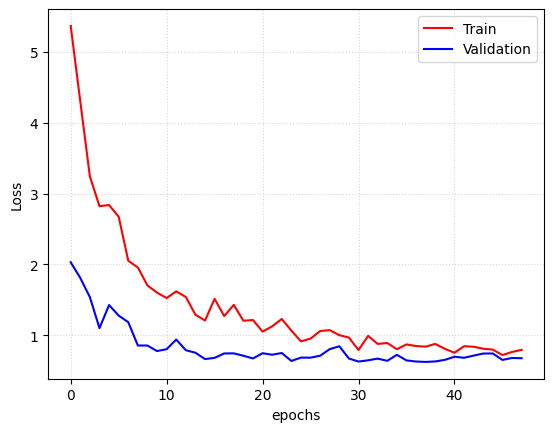

In [28]:
plt.plot(history.history['loss'], c = 'r', label = 'Train')
plt.plot(history.history['val_loss'], c = 'b', label = 'Validation')
plt.legend()
plt.grid(alpha = 0.5, linestyle = ':')
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.show()